#INTRODUCTION TO DATA SCIENCE AND DATA VISUALIZATION 2027202-1/2022-1

#PROJECT PROGRESS REPORT: EXPLORATORY DATA ANALYSIS (EDA)
#TEAM 3: Humor detection
###PREPARED BY

Leyla Rocío Becerra Barajas 
lrbecerrab@unal.edu.co


Camilo Alfonso Mosquera Benavides 
camosquerab@unal.edu.co


Joan Gabriel Bofill Barrera 
jgbofillb@unal.edu.co

#Preliminary
Libraries and functions

In [1]:
!pip install git+https://github.com/bmabey/pyLDAvis.git

  Cloning https://github.com/bmabey/pyLDAvis.git to /tmp/pip-req-build-nokquuy3
  Running command git clone -q https://github.com/bmabey/pyLDAvis.git /tmp/pip-req-build-nokquuy3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import matplotlib.pyplot as plt
import nltk
import networkx as nx
import numpy as np
import pandas as pd
import pyLDAvis
import seaborn as sns
import gensim
from collections import  Counter
from matplotlib.pyplot import figure
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [6]:
# Code Snippet for Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

In [7]:
# Code Snippet for Top Stopwords Barchart
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

In [8]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

In [9]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

In [11]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

In [12]:
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

In [ ]:
def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

In [13]:
def sentiment(x):
  if x<0:
    return 'neg'
  elif x==0:
    return 'neu'
  else:
      return 'pos'

In [14]:
url_dataset = 'https://raw.githubusercontent.com/lrbecerrab/ids2022iteam3/main/dataset/dataset.csv?token=GHSAT0AAAAAABPDF3FNVALVDYWKYSZVFRIOYUIIWDQ'
dsfile = pd.read_csv(url_dataset)
dsfile


,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False


#Characters in each sentence

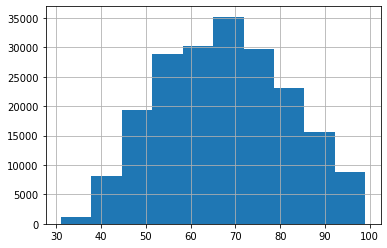

In [15]:
dsfile['text'].str.len().hist()

#Words in each sentence

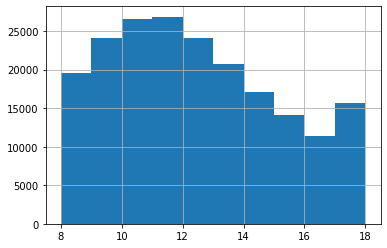

In [16]:
plot_word_number_histogram(dsfile['text'])    

#Stopwords

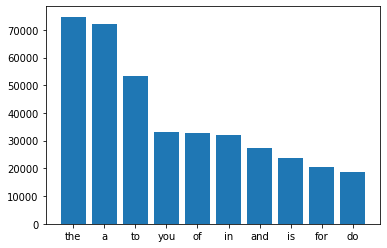

In [17]:
plot_top_stopwords_barchart(dsfile['text'])

Top non stopwords barchart

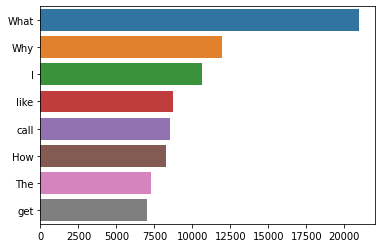

In [18]:
plot_top_non_stopwords_barchart(dsfile['text'])

#Top ngrams barchart

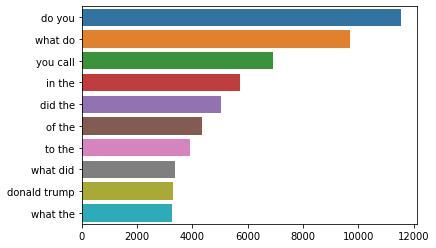

In [19]:
plot_top_ngrams_barchart(dsfile['text'],2)

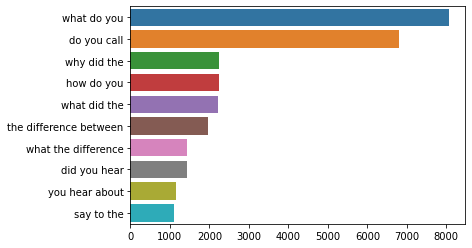

In [20]:
plot_top_ngrams_barchart(dsfile['text'],3)

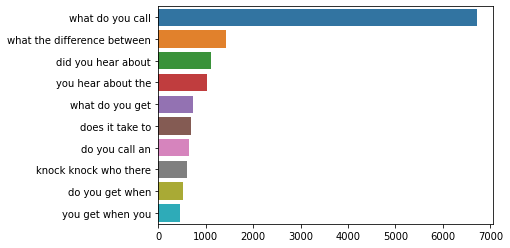

In [21]:
plot_top_ngrams_barchart(dsfile['text'],4)

#Word cloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


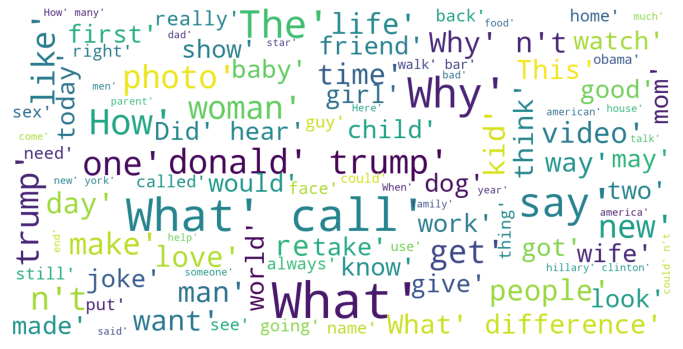

In [25]:
plot_wordcloud(dsfile['text'])

#Sentiment barchart

In [ ]:
plot_sentiment_barchart(dsfile['text'], method='Vader')

#Polarity score histogram

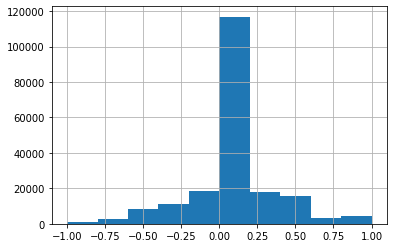

In [26]:
plot_polarity_histogram(dsfile['text'])

#Topic Model VIS